In [ ]:
import pandas as pd
import numpy as np
import networkx as nx

In [ ]:

# CREATE NETWORK GML
csv_file = "pharma_prescriber_network_data_weights.csv"  
df = pd.read_csv(csv_file)

G = nx.from_pandas_edgelist(df, source='prscrbr_npi', target='labelname')

gml_file = "pharma_prescriber_network_data_weights.gml" 
nx.write_gml(G, gml_file)

print(f"Graph saved to {gml_file}")"


Graph saved to pharma_prescriber_network_data_weights.gml


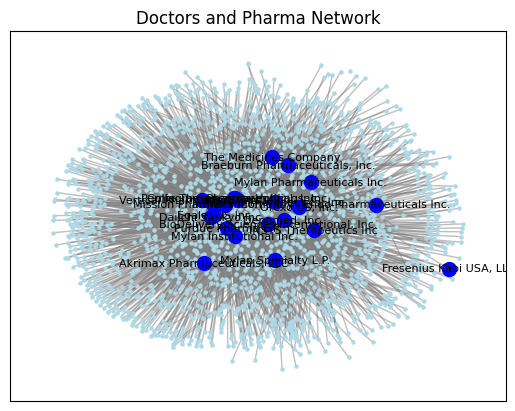

In [23]:
import matplotlib.pyplot as plt

# Load the graph from the GML file
G_loaded = nx.read_gml("pharma_prescriber_network_data_weights.gml")

# Remove specific prescriber nodes from the graph
nodes_to_remove = ["Purdue Transdermal Technologies L.P.", "Mallinckrodt LLC"]
isolated_prscrbr_npi_nodes = [node for node in prscrbr_npi_nodes if G_loaded.degree(node) == 0]
G_loaded.remove_nodes_from(isolated_prscrbr_npi_nodes)
G_loaded.remove_nodes_from(nodes_to_remove)

# Update the layout after removing nodes
pos = nx.spring_layout(G_loaded, k=0.2)

# Separate nodes into labelname nodes and prscrbr_npi nodes
labelname_nodes = [node for node in G_loaded.nodes if node in labels]
prscrbr_npi_nodes = [node for node in G_loaded.nodes if node not in labels]

# Draw the prscrbr_npi nodes
nx.draw_networkx_nodes(G_loaded, pos, nodelist=prscrbr_npi_nodes, node_color='lightblue', node_size=5)

# Draw the labelname nodes
nx.draw_networkx_nodes(G_loaded, pos, nodelist=labelname_nodes, node_color='blue', node_size=100)

# Draw edges
nx.draw_networkx_edges(G_loaded, pos, edge_color = 'gray', alpha=0.5)

# Create a filtered labels dictionary for labelname nodes only
filtered_labels = {node: labels[node] for node in labelname_nodes if node in labels}

# Draw labels only for labelname nodes
nx.draw_networkx_labels(G_loaded, pos, labels=filtered_labels, font_size=8)

plt.title("Doctors and Pharma Network")
plt.show()

In [ ]:
import matplotlib.pyplot as plt
import networkx as nx

# Load the graph from the GML file
G_loaded = nx.read_gml("pharma_prescriber_network_data_weights.gml")

# Remove specific prescriber nodes from the graph
nodes_to_remove = ["Purdue Transdermal Technologies L.P.", "Mallinckrodt LLC"]
prscrbr_npi_nodes = [node for node in G_loaded.nodes if node not in labels]
isolated_prscrbr_npi_nodes = [node for node in prscrbr_npi_nodes if G_loaded.degree(node) == 0]
G_loaded.remove_nodes_from(isolated_prscrbr_npi_nodes)
G_loaded.remove_nodes_from(nodes_to_remove)

# Separate nodes into labelname nodes and prscrbr_npi nodes
labelname_nodes = [node for node in G_loaded.nodes if node in labels]
prscrbr_npi_nodes = [node for node in G_loaded.nodes if node not in labels]

# Manually assign positions
pos = {}

# Spread out labelname_nodes on the left (x=0) along the y-axis
for i, node in enumerate(labelname_nodes):
    y = i / (len(labelname_nodes) - 1) if len(labelname_nodes) > 1 else 0.5  # Evenly distribute y-coordinates
    pos[node] = (0, y)  # Place on the left side (x=0)

# Spread out prscrbr_npi_nodes on the right (x=1) along the y-axis
for i, node in enumerate(prscrbr_npi_nodes):
    y = i / (len(prscrbr_npi_nodes) - 1) if len(prscrbr_npi_nodes) > 1 else 0.5  # Evenly distribute y-coordinates
    pos[node] = (1, y)  # Place on the right side (x=1)

# Draw the prscrbr_npi nodes
nx.draw_networkx_nodes(G_loaded, pos, nodelist=prscrbr_npi_nodes, node_color='lightblue', node_size=5)

# Draw the labelname nodes
nx.draw_networkx_nodes(G_loaded, pos, nodelist=labelname_nodes, node_color='blue', node_size=100)

# Draw edges
nx.draw_networkx_edges(G_loaded, pos, edge_color='gray', alpha=0.5)

# Create a filtered labels dictionary for labelname nodes only
filtered_labels = {node: labels[node] for node in labelname_nodes if node in labels}

# Draw labels only for labelname nodes
nx.draw_networkx_labels(G_loaded, pos, labels=filtered_labels, font_size=8)

plt.title("Doctors and Pharma Network")
plt.show()